### GROUP 11

**1. Library Import Cell**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [19]:
data = pd.read_csv('coin_Bitcoin.csv')

data['Label'] = data['Close'] > data['Close'].mean()

X = data[['Open', 'High', 'Low', 'Volume', 'Marketcap']]
y = data['Label']


---

Accuracy for k=3: 0.998330550918197
Accuracy for k=5: 0.996661101836394
Accuracy for k=7: 1.0
Accuracy for k=9: 1.0
Accuracy for k=11: 0.998330550918197


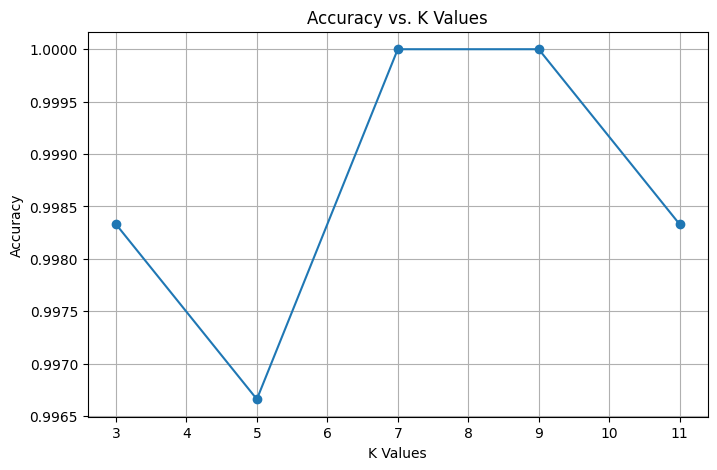

In [20]:
# Different k values
k_values = [3, 5, 7, 9, 11]
accuracy_per_k = []

for k in k_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_k.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy}')

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_per_k, marker='o')
plt.title('Accuracy vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


---

Accuracy for 70.0/30 training/testing split: 0.9966592427616926
Accuracy for 75.0/25 training/testing split: 0.9973262032085561
Accuracy for 80.0/20 training/testing split: 0.996661101836394
Accuracy for 85.0/15 training/testing split: 0.9955456570155902
Accuracy for 90.0/10 training/testing split: 0.9966666666666667


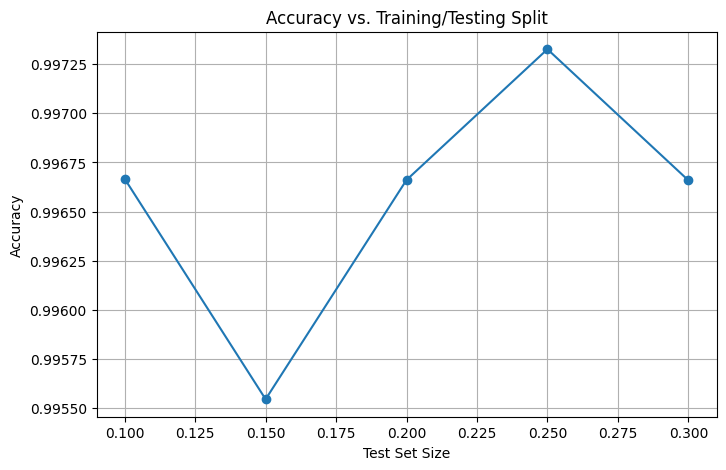

In [21]:
# Training/Testing
split_sizes = [0.7, 0.75, 0.8, 0.85, 0.9]
accuracy_per_split = []

for size in split_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - size), random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_split.append(accuracy)
    print(f'Accuracy for {size*100}/{"{:.0f}".format((1-size)*100)} training/testing split: {accuracy}')

plt.figure(figsize=(8, 5))
plt.plot([(1 - size) for size in split_sizes], accuracy_per_split, marker='o')
plt.title('Accuracy vs. Training/Testing Split')
plt.xlabel('Test Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


---

Cross-validated scores: [0.9973262  0.95187166 1.         1.         0.98128342 1.
 0.98930481 0.93029491]
Mean accuracy: 0.981260125302863


ValueError: x and y must have same first dimension, but have shapes (5,) and (8,)

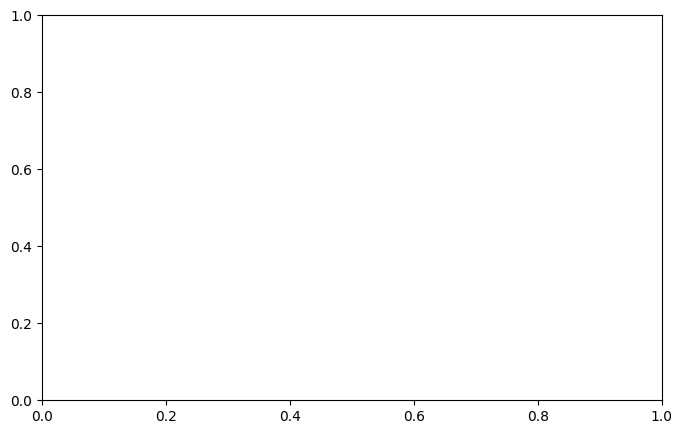

In [28]:
# K-FOLD
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validated scores:', scores)
print('Mean accuracy:', scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), scores, marker='o')
plt.title('Cross-Validated Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
